In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Data Exploration

In [ ]:
df=pd.read_excel('/content/Rotten_Tomatoes_Movies3.xls')

In [ ]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [ ]:
df.nunique()

,0
movie_title,16106
movie_info,16613
critics_consensus,8307
rating,8
genre,1080
directors,8314
writers,12121
cast,16326
in_theaters_date,5586
on_streaming_date,2260


In [ ]:
df.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [ ]:
df.dropna(inplace=True, axis=0)


In [ ]:
df.drop('critics_consensus', axis=1, inplace=True)


In [ ]:
df.shape


(7610, 15)

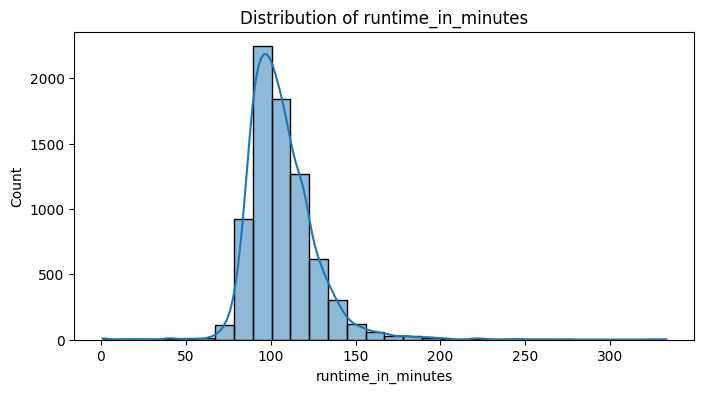

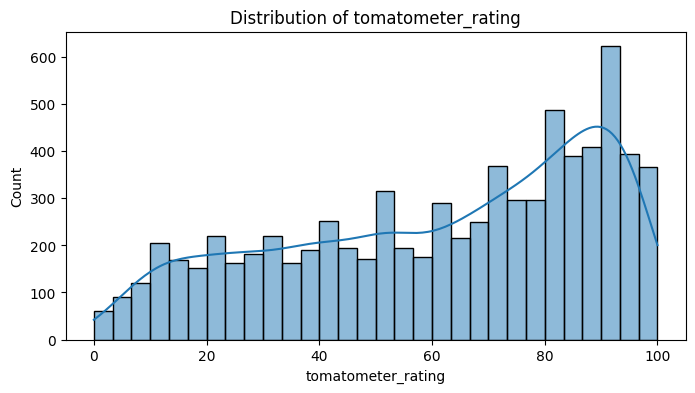

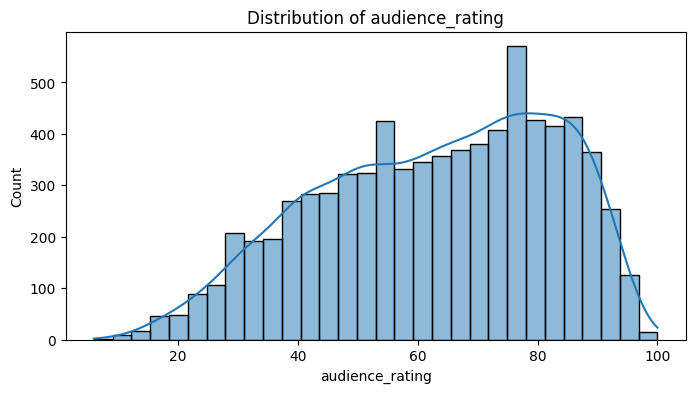

In [ ]:
numerical_cols = ['runtime_in_minutes', 'tomatometer_rating', 'audience_rating']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

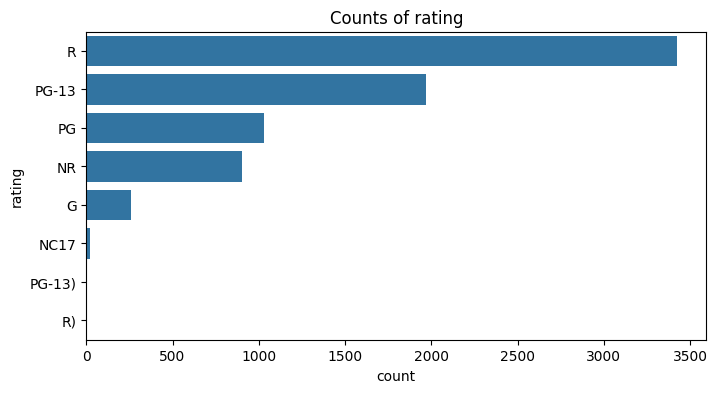

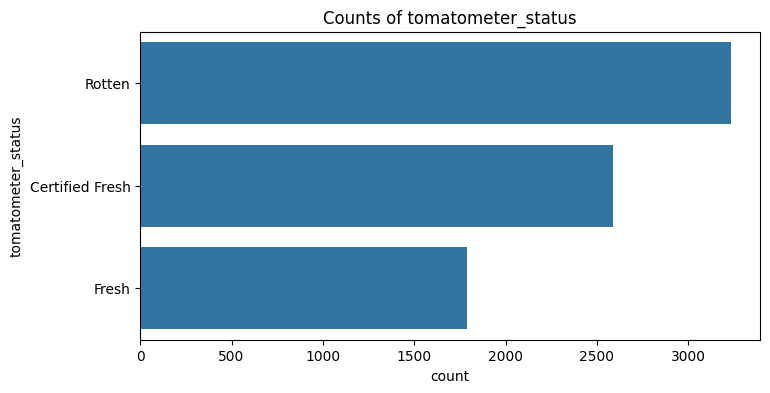

In [ ]:
categorical_cols = ['rating', 'tomatometer_status']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Counts of {col}')
    plt.show()

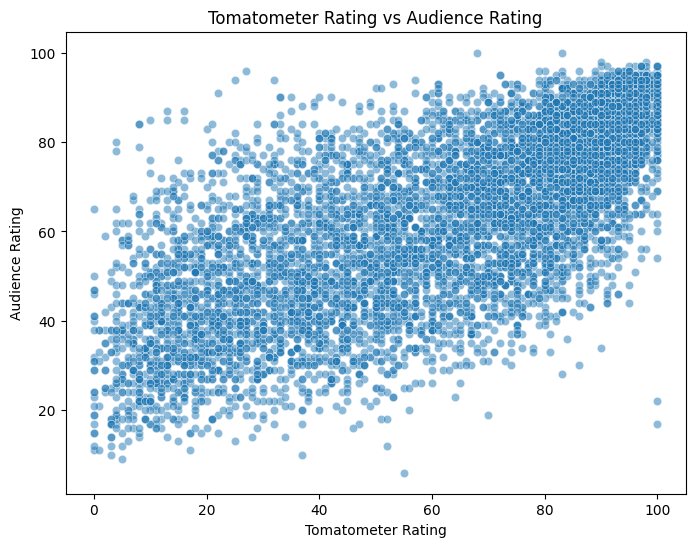

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['tomatometer_rating'], y=df['audience_rating'], alpha=0.5)
plt.title('Tomatometer Rating vs Audience Rating')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Audience Rating')
plt.show()

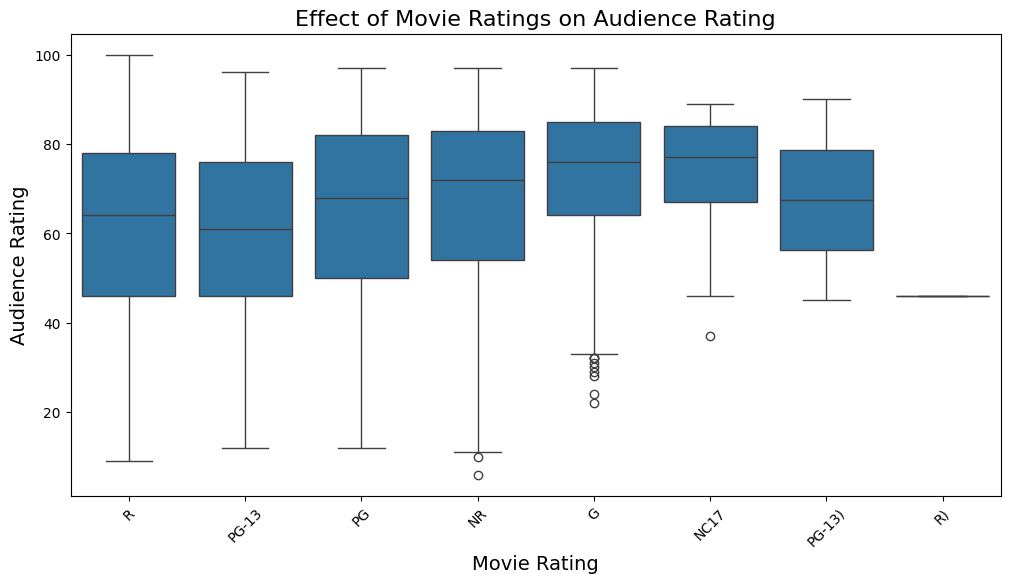

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['rating'], y=df['audience_rating'], order=df['rating'].value_counts().index)
plt.title("Effect of Movie Ratings on Audience Rating", fontsize=16)
plt.xlabel("Movie Rating", fontsize=14)
plt.ylabel("Audience Rating", fontsize=14)
plt.xticks(rotation=45)
plt.show()

rating
R         3422
PG-13     1971
PG        1029
NR         903
G          261
NC17        21
PG-13)       2
R)           1
Name: count, dtype: int64


Text(0.5, 1.0, 'Content Ratings Counts')

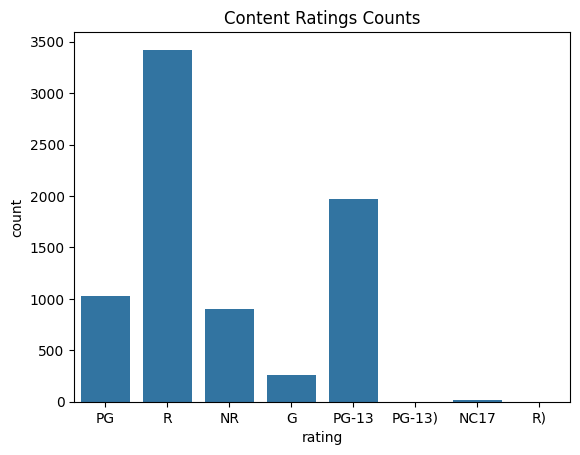

In [ ]:
print(df['rating'].value_counts())
sns.countplot(data=df, x='rating')
plt.title('Content Ratings Counts')

studio_name
Warner Bros. Pictures     404
Universal Pictures        373
20th Century Fox          347
Paramount Pictures        322
IFC Films                 221
Sony Pictures Classics    218
Sony Pictures             157
Magnolia Pictures         150
Columbia Pictures         147
Miramax Films             130
Name: count, dtype: int64


Text(0.5, 1.0, 'Audience Status Counts')

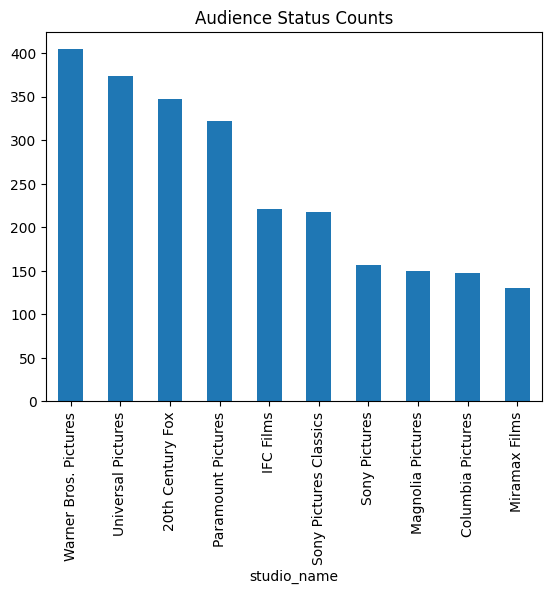

In [ ]:
print(df['studio_name'].value_counts()[:10])
df['studio_name'].value_counts()[:10].plot(kind='bar')
plt.title('Audience Status Counts')

<ipython-input-181-70fc9262fe41>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, top_studios['avg_audience_rating'][i] + 0.2, str(count), ha='center', fontsize=10, color='black')


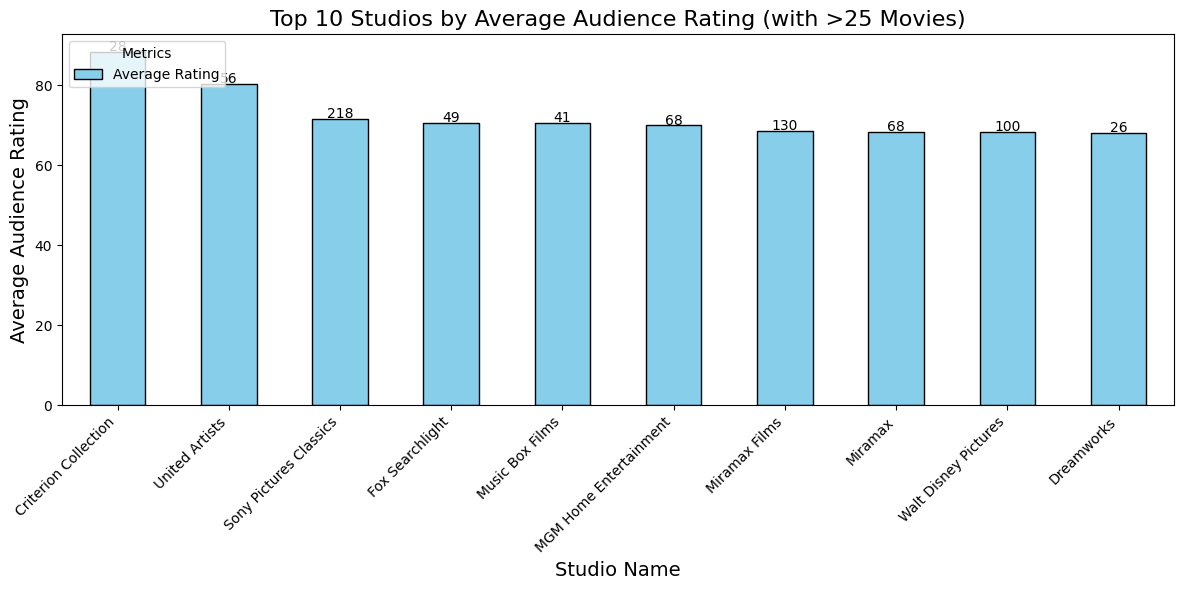

In [ ]:
studio_stats = df.groupby('studio_name').agg(
    avg_audience_rating=('audience_rating', 'mean'),
    movie_count=('studio_name', 'size')
)

filtered_studios = studio_stats[studio_stats['movie_count'] > 25].sort_values(by='avg_audience_rating', ascending=False)

top_studios = filtered_studios.head(10)

plt.figure(figsize=(12, 6))
ax = top_studios['avg_audience_rating'].plot(kind='bar', color='skyblue', edgecolor='black', label='Average Rating', width=0.5)
for i, count in enumerate(top_studios['movie_count']):
    ax.text(i, top_studios['avg_audience_rating'][i] + 0.2, str(count), ha='center', fontsize=10, color='black')

plt.title('Top 10 Studios by Average Audience Rating (with >25 Movies)', fontsize=16)
plt.xlabel('Studio Name', fontsize=14)
plt.ylabel('Average Audience Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics', loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'])
df['in_theaters_date'] = df['in_theaters_date'].dt.year

Year with most number of movies:  2007
Year with least number of movies:  1924


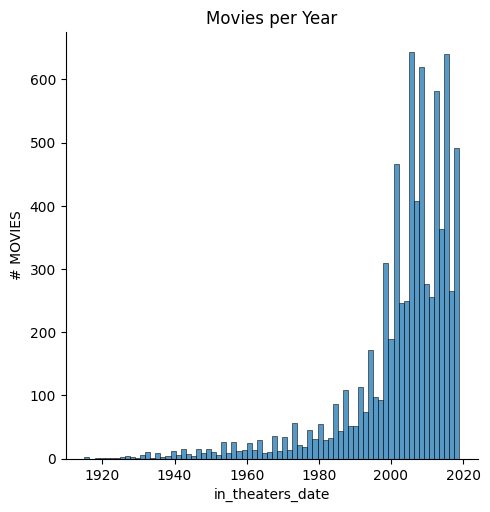

In [ ]:
sns.displot(data=df, x='in_theaters_date')
plt.ylabel('# MOVIES')
plt.title('Movies per Year')
print('Year with most number of movies: ', df['in_theaters_date'].value_counts().index[0])
print('Year with least number of movies: ', df['in_theaters_date'].value_counts().index[-1])

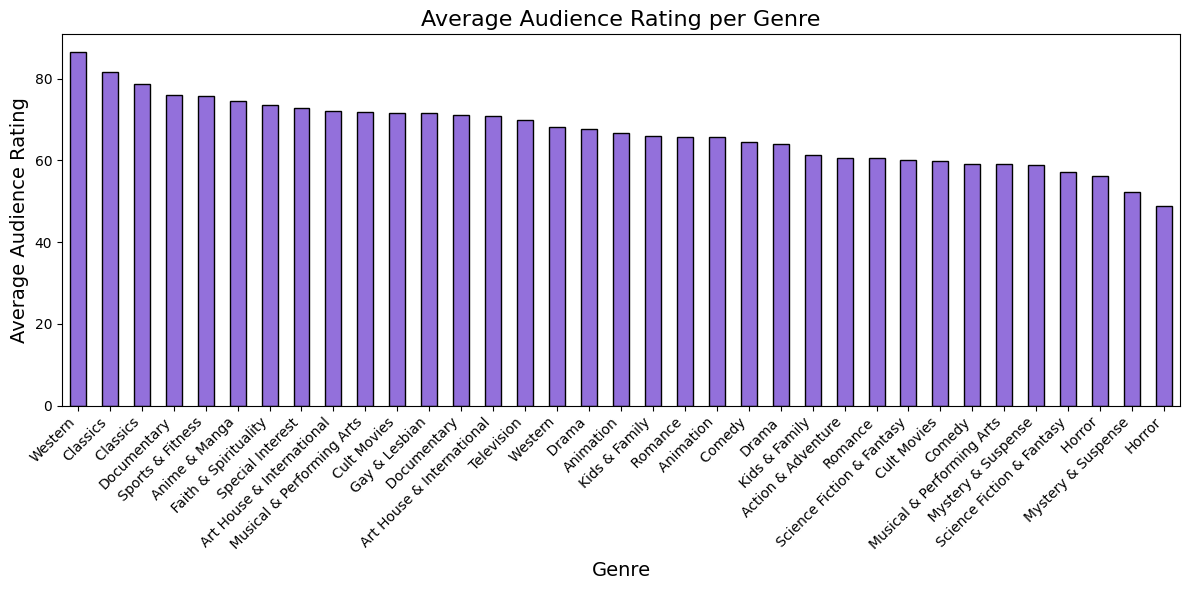

In [ ]:
import matplotlib.pyplot as plt

df['genres_list'] = df['genre'].str.split(',')
genres_exploded = df.explode('genres_list')

average_rating_per_genre = genres_exploded.groupby('genres_list')['audience_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
average_rating_per_genre.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Average Audience Rating per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Audience Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Axes: >

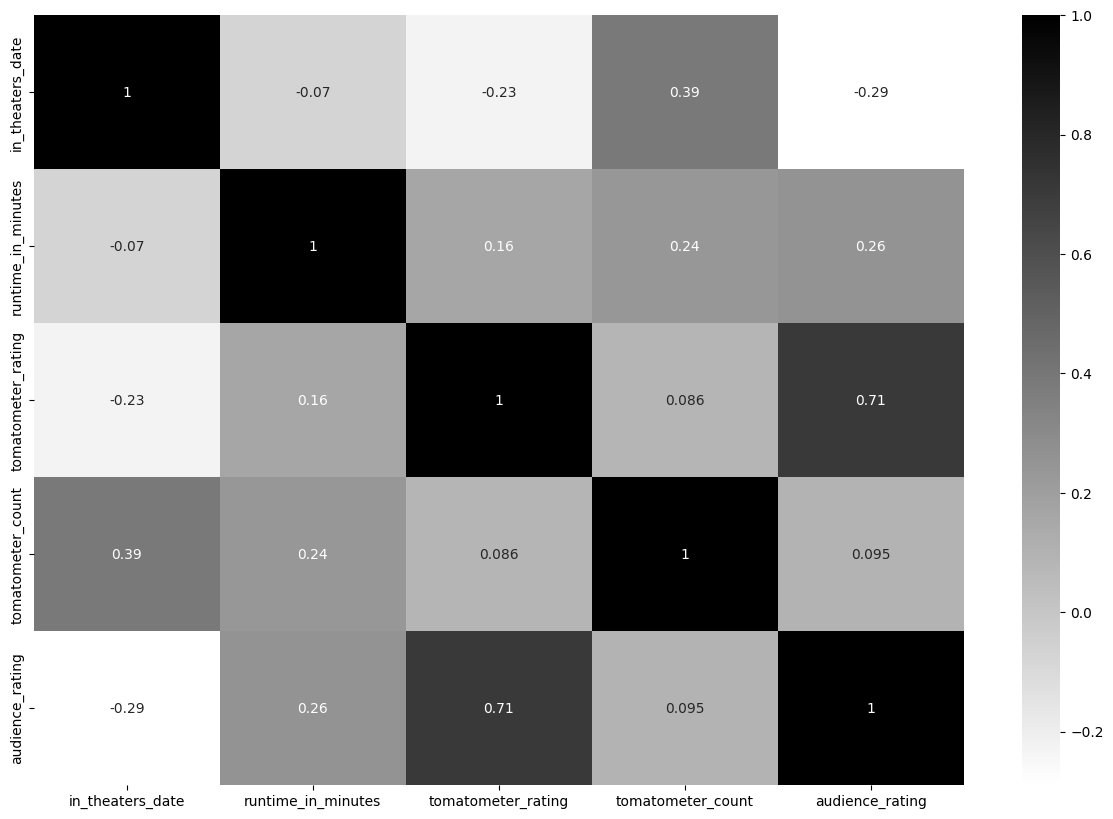

In [ ]:
corr = df.select_dtypes('number').corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='binary')

In [ ]:
df.columns

Index(['movie_title', 'movie_info', 'rating', 'genre', 'directors', 'writers',
       'cast', 'in_theaters_date', 'on_streaming_date', 'runtime_in_minutes',
       'studio_name', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_rating', 'genres_list'],
      dtype='object')

In [ ]:
df.head()

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,genres_list
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,"[Action & Adventure, Comedy, Drama, Science..."
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,[Comedy]
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,"[Classics, Drama]"
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954,2003-05-20,127.0,Disney,Fresh,89,27,74.0,"[Action & Adventure, Drama, Kids & Family]"
5,"10,000 B.C.",A young outcast from a primitive tribe is forc...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008,2008-06-24,109.0,Warner Bros. Pictures,Rotten,8,148,37.0,"[Action & Adventure, Classics, Drama]"


In [ ]:
df['genre'].nunique()

624

#Data Preprocessing


In [ ]:
#Used to find the sentiment of critic_consensus

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from typing import Dict, Union, Optional

def analyze_sentiment(text: str, detailed: bool = False) -> Union[float, Dict[str, float]]:

    try:
        try:
            nltk.data.find('sentiment/vader_lexicon.zip')
        except LookupError:
            nltk.download('vader_lexicon')

        sid = SentimentIntensityAnalyzer()

        scores = sid.polarity_scores(text)

        if detailed:
            return scores
        return scores['compound']

    except Exception as e:
        print(f"Error analyzing sentiment: {str(e)}")
        return None





In [ ]:
#Genre One hot encoding

import pandas as pd
import ast
from typing import Union, List

class GenreProcessor:
    def __init__(self):
        self.all_genres = set()

    def extract_genres(self, genre_str: str) -> List[str]:
        try:
            if isinstance(genre_str, str):
                cleaned = genre_str.strip('[]').replace("'", "").replace('"', '')
                genres = [g.strip() for g in cleaned.split(',') if g.strip()]
                return genres
            elif isinstance(genre_str, list):
                return genre_str
            else:
                return []
        except:
            return []

    def create_genre_features(self, df: pd.DataFrame, genre_column: str = 'genre') -> pd.DataFrame:
        result_df = df.copy()

        result_df['genres_list'] = result_df[genre_column].apply(self.extract_genres)

        all_genres = set()
        for genres in result_df['genres_list']:
            all_genres.update(genres)
        self.all_genres = all_genres

        for genre in self.all_genres:
            col_name = f'genre_{genre.lower().replace(" ", "_")}'
            result_df[col_name] = result_df['genres_list'].apply(
                lambda x: 1 if genre in x else 0
            )

        result_df.drop('genres_list', axis=1, inplace=True)

        return result_df

    def get_genre_statistics(self, df: pd.DataFrame) -> pd.DataFrame:
        stats = []
        genre_columns = [col for col in df.columns if col.startswith('genre_')]

        for col in genre_columns:
            genre_name = col.replace('genre_', '').replace('_', ' ').title()
            count = df[col].sum()
            percentage = (count / len(df)) * 100

            stats.append({
                'genre': genre_name,
                'count': count,
                'percentage': percentage
            })

        return pd.DataFrame(stats).sort_values('count', ascending=False)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

data=pd.read_excel('/content/Rotten_Tomatoes_Movies3.xls')
data.dropna(inplace=True, axis=0)
data['genres_list'] = data['genre'].str.split(',')

processor = GenreProcessor()
data = processor.create_genre_features(data)

data_cleaned = data.dropna(subset=['audience_rating'])

data_cleaned['runtime_in_minutes'].fillna(data_cleaned['runtime_in_minutes'].median(), inplace=True)
# data_cleaned['runtime_category'] = data_cleaned['runtime_in_minutes'].apply(runtime_category)

data_cleaned['genre'].fillna("Unknown", inplace=True)
data_cleaned['studio_name'].fillna("Unknown", inplace=True)
data_cleaned['writer_director_combination'] = data_cleaned['writers'] + " & " + data_cleaned['directors']
data_cleaned['critics_consensus'] = data_cleaned['critics_consensus'].fillna("")
data_cleaned['movie_info'] = data_cleaned['movie_info'].fillna("")
data_cleaned['critics_sentiment'] = data_cleaned['critics_consensus'].apply(analyze_sentiment)
# data_cleaned['movie_info_sentiment'] = data_cleaned['movie_info'].apply(analyze_sentiment)
# Convert 'in_theaters_date' to datetime and extract year and month
data_cleaned['in_theaters_date'] = pd.to_datetime(data_cleaned['in_theaters_date'], errors='coerce')
data_cleaned['release_year'] = data_cleaned['in_theaters_date'].dt.year
data_cleaned['release_month'] = data_cleaned['in_theaters_date'].dt.month

data_cleaned['release_year'].fillna(data_cleaned['release_year'].median(), inplace=True)
data_cleaned['release_month'].fillna(-1, inplace=True)

label_encoders = {}
for column in [ 'studio_name', 'rating', 'tomatometer_status','writer_director_combination']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column].astype(str))
    label_encoders[column] = le

data_prepared = data_cleaned.drop(columns=[
    'movie_title', 'movie_info', 'critics_consensus', 'cast','directors',
    'writers', 'in_theaters_date', 'on_streaming_date','genre'
])



<ipython-input-191-8ce4ff9b917d>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['runtime_in_minutes'].fillna(data_cleaned['runtime_in_minutes'].median(), inplace=True)
<ipython-input-191-8ce4ff9b917d>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

#Model Creation

In [ ]:
X = data_prepared.drop(columns=['audience_rating'])
y = data_prepared['audience_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42, n_estimators=175)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [ ]:
print("Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Evaluation Results:
Mean Absolute Error (MAE): 9.31365496527126
Mean Squared Error (MSE): 139.88345762020973
Root Mean Squared Error (RMSE): 11.827233726455638
R^2 Score: 0.6322792617849717
